# Ejercicio 3: Comparación de algoritmos de búsqueda

Este notebook genera K laberintos, resuelve cada uno con 4 algoritmos y muestra:

1. Un DataFrame interactivo con todos los experimentos  
2. Un resumen promedio
3. Gráficos de barras para nodos expandidos y tiempos  


In [1]:
# 1) Imports y configuración
import pandas as pd
import matplotlib.pyplot as plt
from experimentos import run_experiments
from reporte import analyze_results

# Para que los DataFrame se vean mejor en Jupyter:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [2]:
# 2) Correr los experimentos (ajusta rows, cols, mazes si deseas)
df = run_experiments(rows=45, cols=55, k=25)

In [3]:
# 3) Mostrar los primeros resultados
df.head(10)

,Maze,Algorithm,Distance,Expanded,Time_s
0,1,DFS,194,203,0.000421
1,1,BFS,194,692,0.001074
2,1,Dijkstra,194,688,0.001477
3,1,A*,194,552,0.001205
4,2,DFS,622,827,0.002280
5,2,BFS,622,959,0.002201
6,2,Dijkstra,622,956,0.002433
7,2,A*,622,905,0.002452
8,3,DFS,48,1141,0.002871
9,3,BFS,48,104,0.000134


In [4]:
# 4) Calcular y mostrar el resumen promedio
summary = analyze_results(df)
summary

,Distance,Expanded,Time_s,Place
Algorithm,,,,
A*,234.2,580.72,0.001317,1.60
DFS,234.2,670.44,0.001364,2.20
BFS,234.2,632.64,0.000945,3.04
Dijkstra,234.2,632.24,0.001307,3.16


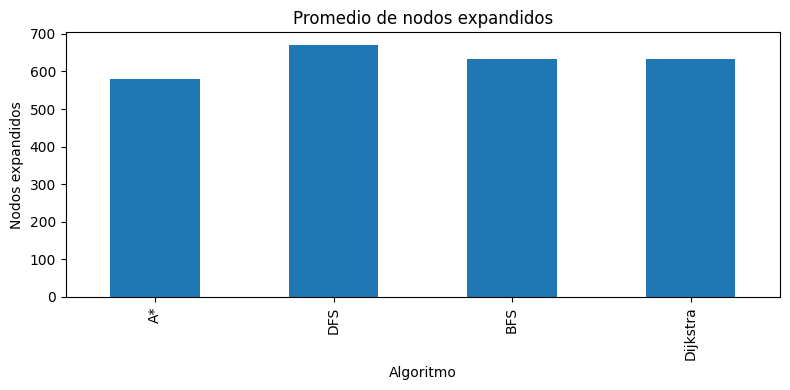

In [5]:
# 5) Gráfico: promedio de nodos expandidos por algoritmo
plt.figure(figsize=(8,4))
summary['Expanded'].plot.bar()
plt.title('Promedio de nodos expandidos')
plt.ylabel('Nodos expandidos')
plt.xlabel('Algoritmo')
plt.tight_layout()
plt.show()

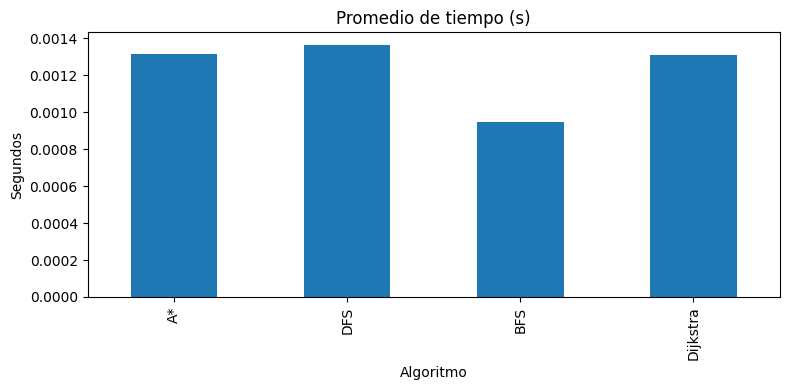

In [6]:
# 6) Gráfico: promedio de tiempo de ejecución por algoritmo
plt.figure(figsize=(8,4))
summary['Time_s'].plot.bar()
plt.title('Promedio de tiempo (s)')
plt.ylabel('Segundos')
plt.xlabel('Algoritmo')
plt.tight_layout()
plt.show()